In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. 

In [34]:
#reading and loading your data
df = pd.read_csv('btc-market-price.csv', header = None)

In [35]:
#num of rows and columns
df.shape

(365, 2)

In [36]:
#reading the first five rows
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [37]:
#changing column names
df.columns = ['Time_stamp', 'Price']

In [38]:
#reading first five rows
df.head()

,Time_stamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [39]:
# getting the basic info on  the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time_stamp  365 non-null    object 
 1   Price       365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [40]:
#coverting 'Time_stamp' column to datatime type
df['Time_stamp'] = pd.to_datetime(df['Time_stamp'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time_stamp  365 non-null    datetime64[ns]
 1   Price       365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [42]:
#creating new columns from the time stamp
df['Day'] = pd.DatetimeIndex(df['Time_stamp']).day
df['Month'] = pd.DatetimeIndex(df['Time_stamp']).month
df['Year'] = pd.DatetimeIndex(df['Time_stamp']).year

In [44]:
df.head()

,Time_stamp,Price,Day,Month,Year
0,2017-04-02,1099.169125,2,4,2017
1,2017-04-03,1141.813000,3,4,2017
2,2017-04-04,1141.600363,4,4,2017
3,2017-04-05,1133.079314,5,4,2017
4,2017-04-06,1196.307937,6,4,2017


In [45]:
#setting a column as index
df.set_index('Time_stamp', inplace=True)

In [46]:
df.head()

,Price,Day,Month,Year
Time_stamp,,,,
2017-04-02,1099.169125,2,4,2017
2017-04-03,1141.813000,3,4,2017
2017-04-04,1141.600363,4,4,2017
2017-04-05,1133.079314,5,4,2017
2017-04-06,1196.307937,6,4,2017


In [47]:
#accessing value of a dataframe using row index
df.loc['2017-09-29']

Price    4193.574667
Day        29.000000
Month       9.000000
Year     2017.000000
Name: 2017-09-29 00:00:00, dtype: float64

In [48]:
df.iloc[0]

Price    1099.169125
Day         2.000000
Month       4.000000
Year     2017.000000
Name: 2017-04-02 00:00:00, dtype: float64

In [49]:
#checking unique values
df.Year.unique()

array([2017, 2018], dtype=int64)

In [50]:
# extracting sub data frame from a master data frame
df_2017 = df[df['Year']==2017]

In [51]:
df_2017.head()

,Price,Day,Month,Year
Time_stamp,,,,
2017-04-02,1099.169125,2,4,2017
2017-04-03,1141.813000,3,4,2017
2017-04-04,1141.600363,4,4,2017
2017-04-05,1133.079314,5,4,2017
2017-04-06,1196.307937,6,4,2017


In [52]:
df_2018 = df[df['Year']==2018]

In [53]:
df_2018.head()

,Price,Day,Month,Year
Time_stamp,,,,
2018-01-01,13812.186667,1,1,2018
2018-01-02,15005.856667,2,1,2018
2018-01-03,15053.261667,3,1,2018
2018-01-04,15199.355000,4,1,2018
2018-01-05,17174.120000,5,1,2018


In [54]:
df_2017.groupby('Month')['Day'].count()

Month
4     29
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: Day, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Plotting basics

`pandas` integrates with Matplotlib and creating a plot is as simple as:

<AxesSubplot:xlabel='Time_stamp'>

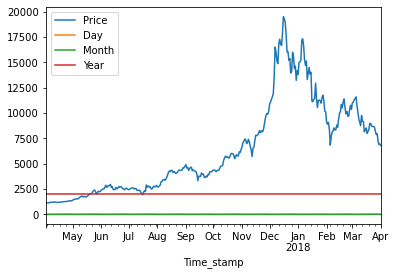

In [23]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

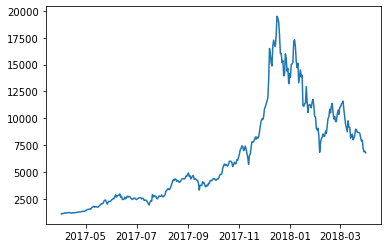

In [24]:
plt.plot(df.index, df['Price'])

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

## LINE PLOT
A line plot is the simplest plot that displays the relationship between the one independent and one dependent variable in the dataset. In this plot, the points are joined by straight line segments.

In [25]:
x = np.arange(-10, 11)
y = x ** 2

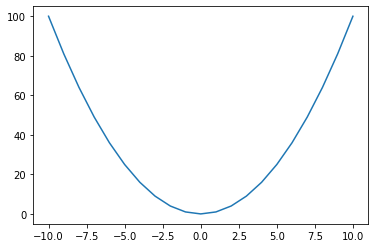

In [61]:
plt.plot(x,y)
plt.show()

**Line plot can be represented not only by a solid line, but also a dotted line with varied thickness. The points can be marked explicitly using any symbol.**

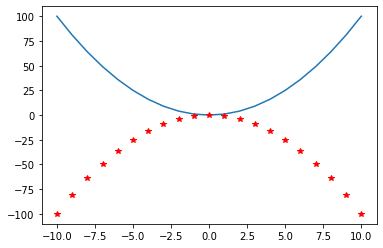

In [62]:
y1 = -1 * (x ** 2)
plt.plot(x, y)
plt.plot(x, y1,'r*')
plt.show()

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

Text(0, 0.5, 'Values of Y')

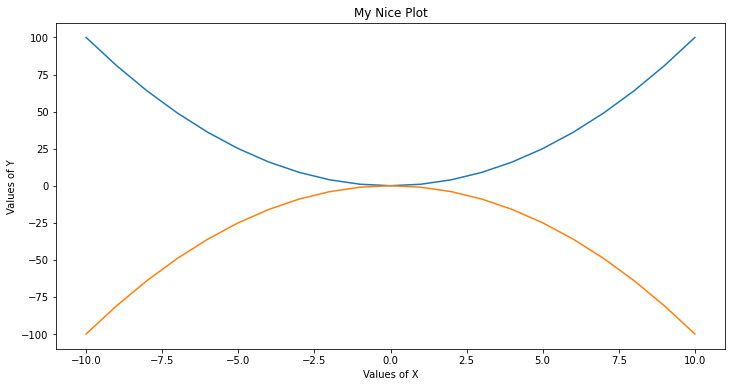

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.plot(x,y1)

plt.title('My Nice Plot')
plt.xlabel('Values of X')
plt.ylabel('Values of Y')

# pie plot
Pie plot is a graphical representation of univariate data. It is a circular graph divided into slices displaying the numerical proportion. For the categorical variable, each slice of the pie plot corresponds to each of the categories.

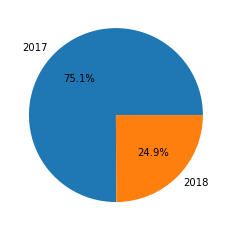

In [64]:
df_by_year = df.groupby(['Year']).size()
labels =['2017','2018']
plt.pie(df_by_year, autopct='%1.1f%%',labels = labels)
plt.show()

In [30]:
df_by_year = df.groupby(['Year']).size()
df_by_year

Year
2017    274
2018     91
dtype: int64

## Scatter plot
A scatter plot is a set of points plotted on horizontal and vertical axes. The scatter plot can be used to study the correlation between the two variables. One can also detect the extreme data points using a scatter plot.

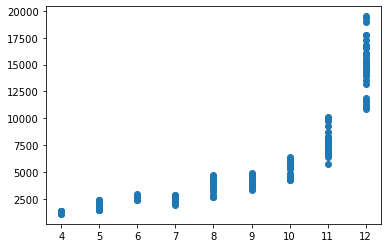

In [63]:
#scatter plot of month against price, this tells the relation 
plt.scatter(df_2017['Month'],df_2017['Price'])
plt.show()

## Boxplot
Boxplotis a way to visualize the five-number summary of the variable. The five-number summary includes the numerical quantities like minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. Boxplot gives information about the outliers in the data. Detecting and removing outliers is one of the most important steps in exploratory data analysis. Boxplots also tells about the distribution of the data

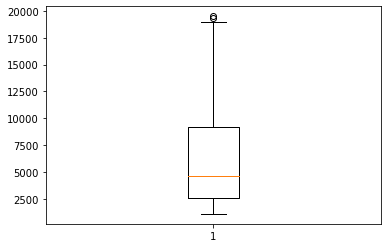

In [66]:
#box plot of price, to detect outliers 
price_column = df.Price
plt.boxplot(price_column)

plt.show()

In [33]:
#bar plot of month against price, this tells the relation 
month_df = pd.DataFrame(df['Month'].value_counts()).reset_index().rename(columns={'index':'Month','Month':'count'})
month_df

,Month,count
0,5,31
1,7,31
2,8,31
3,10,31
4,12,31
5,1,31
6,3,31
7,4,30
8,6,30
9,9,30


## bar plot
A bar plot is used to display categorical data with bars with lengths proportional to the values that they represent. The comparison between different categories of a categorical variable can be done by studying a bar plot. In the vertical bar plot, the X-axis displays the categorical variable and Y-axis contains the values corresponding to different categories.

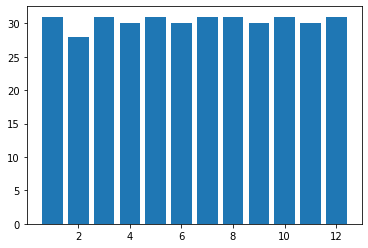

In [56]:
plt.bar(month_df['Month'],month_df['count'])
plt.show()

## histogram
A histogram is used to display the distribution and spread of the continuous variable. One axis represents the range of the variable and the other axis shows the frequency of the data points. In a histogram, there are no gaps between the bars.

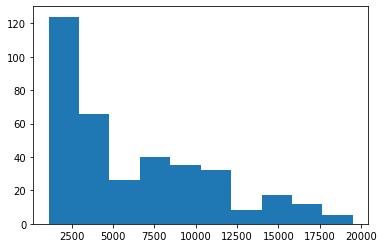

In [65]:
plt.hist(df['Price'])
plt.show()

## Heatmap
Heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. Each square in the heatmap shows the correlation between variables on each axis.
Correlation is a statistic that measures the degree to which two variables are related with each other

In [67]:
corr_matrix = df.corr()

In [68]:
corr_matrix

,Price,Day,Month,Year
Price,1.000000,0.007324,0.012945,0.526719
Day,0.007324,1.000000,0.011893,-0.022729
Month,0.012945,0.011893,1.000000,-0.752835
Year,0.526719,-0.022729,-0.752835,1.000000


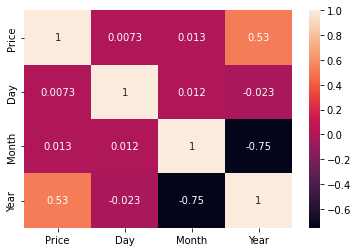

In [69]:
sns.heatmap(corr_matrix, annot = True)
plt.show()